In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ls

bbox_from_binarized_grid.ipynb  bin_img_0090.jpg  package.xml  signs.png
bbox_images.ipynb               CMakeLists.txt    README.md
bin_img_0015.jpg                LICENSE           scripts/


In [3]:
img = cv2.imread('bin_img_0090.jpg')

In [4]:
imgcopy = img.copy()

In [5]:
img = img[:, :, 0] # get one channel, its already like this in the program

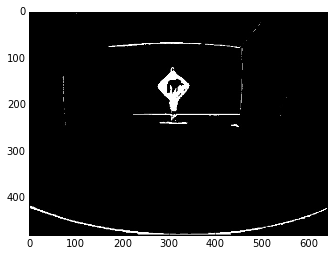

In [6]:
plt.imshow(img, cmap='gray')

In [7]:
def bbox_from_binarized_grid(img, gridsize=(10,10), percentage=0.20):
    gridrows, gridcols = gridsize
    m, n = img.shape
    
    GRID = np.zeros(gridsize)
    
    block_size = (m/gridrows, n/gridcols)
    for i in range(gridrows):
        for j in range(gridcols):
            
            block = img[int(block_size[0]*i):int(block_size[0]*(i+1)), int(block_size[1]*j):int(block_size[1]*(j+1))]
            # if half the block was white (the correct filtered color)
            threshold = block_size[0] * block_size[1] * 255 * percentage
            if block.sum() >= threshold:
                GRID[i,j] = 1
    
    return GRID

In [8]:
grid = bbox_from_binarized_grid(img, gridsize=(15, 15))
print grid

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [9]:
def get_bbox_from_grid(img, grid):
    # get top
    for i in range(grid.shape[0]):
        if grid[i].sum() > 0:
            top = i
            break
    
    # get left
    for j in range(grid.shape[1]):
        if grid[:, j].sum() > 0:
            left = j
            break
        
    # get bottom
    for i in range(grid.shape[0] - 1, -1, -1):
        if grid[i].sum() > 0:
            bottom = i
            break
            
    # get right
    for j in range(grid.shape[1] - 1, -1, -1):
        if grid[:, j].sum() > 0:
            right = j
            break
    
    print (top, left, right, bottom)
    
    # (x, y)
    pt1 = (img.shape[1]/grid.shape[1]*left, img.shape[0]/grid.shape[0]*top)
    
    # (right+1) and (bottom+1) cuz grid only represents the left hand corner of a block
    pt2 = (img.shape[1]/grid.shape[1]*(right+1), img.shape[0]/grid.shape[0]*(bottom+1))
    
    return pt1, pt2


In [10]:
pt1, pt2 = get_bbox_from_grid(img, grid)
print pt1, pt2

(4, 6, 7, 6)
(252, 128) (336, 224)


In [11]:
cv2.rectangle(imgcopy, pt1, pt2, color=(0, 0, 255), thickness=5)

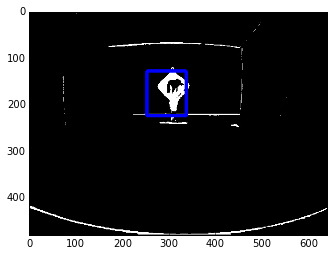

In [12]:
plt.imshow(imgcopy)